# Display the effects of 11 transformations

In [1]:
from TSB_UAD.transformer.transformer import plotdata, transform
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def local_example(original_file_path):
    df = pd.read_csv(original_file_path, header=None).to_numpy()
    
    max_length = 1000
    
    data = df[:max_length,0].astype(float)
    label = df[:max_length,1]
    
    period = 113

    #  local transformation
    fig = plt.figure(figsize=(12, 6),constrained_layout=True)
    gs = fig.add_gridspec(3, 2, hspace=.00, wspace=.05)
    ax = gs.subplots(sharex='col', sharey='row')
    
    # flat_region
    t = transform(6).transform(data, label, contamination=0.2, period=period, seed=15)
    plotdata(t.data,t.label, ax=ax[0][0], title=t.trans_name, max_len=max_length) 
    
    # flip_segment
    t = transform(7).transform(data, label, contamination=0.2, period=period, seed=15)
    plotdata(t.data,t.label, ax=ax[0][1], title=t.trans_name, max_len=max_length) 
    
    # change_segment_add_scale
    t = transform(9).transform(data, label, contamination=0.2, period=period, para=3, method='scale', seed=15)
    plotdata(t.data,t.label, ax=ax[1][0], title=t.trans_name, max_len=max_length) 
    
    # change_segment_normalization
    t = transform(10).transform(data, label, contamination=0.2, period=period, method='Logistic', seed=15)
    plotdata(t.data,t.label, ax=ax[1][1], title=t.trans_name, max_len=max_length) 
    
    # change_segment_partial
    t = transform(11).transform(data, label, contamination=0.2, period=period, para=1, method='noise', seed=15)
    plotdata(t.data,t.label, ax=ax[2][0], title=t.trans_name, max_len=max_length) 
    
    # change_segment_resampling
    t = transform(12).transform(data, label, contamination=0.2, period=period, para=3, seed=15)
    plotdata(t.data,t.label, ax=ax[2][1], title=t.trans_name, max_len=max_length) 
    
    #plt.savefig('./transform_local.png')
    

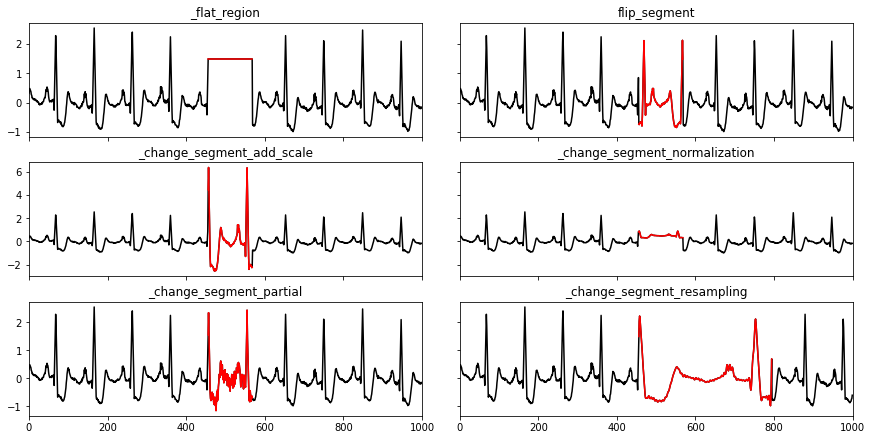

In [3]:
original_file_path = './data/benchmark/ECG/MBA_ECG805_data.out'
local_example(original_file_path)

In [4]:
def global_example(original_file_path):
    df = pd.read_csv(original_file_path, header=None).to_numpy()
    
    max_length = 5000
    
    data = df[:max_length,0].astype(float)
    label = df[:max_length,1]
    
    
    #  global transformation
    fig = plt.figure(figsize=(12,6),constrained_layout=True)
    gs = fig.add_gridspec(3, 2, hspace=.00, wspace=.05)
    (ax1, ax2), (ax3, ax4), (ax5, ax6) = gs.subplots(sharex='col', sharey='row')
    
    # original data
    plotdata(data,label, ax=ax1, max_len=max_length)   
    
    # filter_fft
    t = transform(3).transform(data, label, para=21, seed=5)
    plotdata(t.data,t.label, ax=ax2, title=t.trans_name, max_len=max_length) 
    
    # RW trend
    t = transform(1).transform(data, label, para=.1, seed=5)
    plotdata(t.data,t.label, ax=ax3, title=t.trans_name, max_len=max_length)   
    
    # white noise
    t = transform(5).transform(data, label, para=.5, seed=5)
    plotdata(t.data,t.label, ax=ax5, title=t.trans_name, max_len=max_length)   
    
    # point outlier
    t = transform(2).transform(data, label, para=0.005, seed=15)
    plotdata(t.data,t.label, ax=ax6, title=t.trans_name, max_len=max_length) 
    
    # two seg filter
    t = transform(4).transform(data, label, para=[21,5], seed=15)
    plotdata(t.data,t.label, ax=ax4, title=t.trans_name, max_len=max_length) 

    #plt.savefig('./transform_global.png')


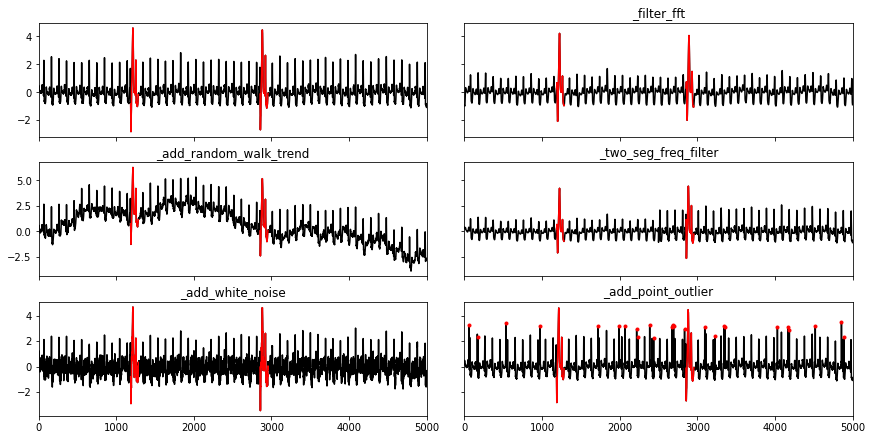

In [5]:
original_file_path = './data/benchmark/ECG/MBA_ECG805_data.out'
global_example(original_file_path)